<a href="https://colab.research.google.com/github/lmoghimi/personal-processing/blob/main/analysis_for_methods_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Run these first**

In [1]:
#@title Imports for JupyterLite
%pip install -q ipywidgets

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

import pandas as pd
import csv

import tkinter as tk
from tkinter import filedialog

from scipy.signal import find_peaks

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 4.3 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#@title Global inputs for raw data processing: directories

userdir = '/content/drive/Shareddrives/leoradm_group/NSLS-II_202406'
# userdir = '/content/drive/Shareddrives/leoradm_group/NSLS-II_202403'
# userdir = '/nsls2/data/xpd-new/legacy/processed/xpdUser'

scriptdir = os.path.join(userdir, 'userScripts')

refsdir = '/content/drive/Shareddrives/leoradm_group/NSLS-II_202406/userScripts/xrd_profiles'

pyromdir = os.path.join(userdir, 'tiff_base')

laserdir = os.path.join(userdir, 'june_laser_programs_and_logs')

# timestamps = ['primary-1', ]
#ntimestamps = 2 #for comparison between t0 and tf
# ntimestamps = 125 #for all runs
#ntimestamps_depths
lw = 0.75 #linewidth

#not sure if these do anything
shift = True
get_timestamps = True

In [4]:
#@title Peak positions
wavelength = 0.1824 #angstrom

#ref_q_fe = [3.128, 5.419, 4.424, 6.995, 8.277, 6.257, 7.663]
#ref_q_fe = [3.128, 5.419, 4.424]
ref_q_fe = [3.128] #prominent isolated phase peak
#lincol_fe='tab:green' #iron
lincol_fe='tab:brown'

#ref_q_w = [2.905, 4.108, 2.516, 4.817, 6.495, 5.031, 7.115, 6.331, 8.715, 8.593, 7.547, 8.216, 5.810]
#ref_q_w = [2.905, 4.108, 2.516]
ref_q_w = [4.108] #prominent isolated phase peak
#lincol_w='tab:red' #wustite
lincol_w='tab:pink'

#ref_q_m = [2.4783, 2.5973, 4.2458, 3.8889, 2.1214, 2.9982, 5.7584, 3.6680, 1.2887, 4.9086]
#ref_q_m = [2.4783, 2.5973, 4.2458]
ref_q_m = [2.1214] #prominent isolated phase peak
#lincol_m='tab:purple' #magnetite
lincol_m='tab:green'

#ref_q_h = [2.4985, 2.3135, 3.7118, 4.3288, 3.41365, 4.2259, 1.6965, 2.8481, 4.8017, 3.92775, 4.9868, 5.6860, 5.5009, 5.9533, 6.5394]
#ref_q_h = [2.4985, 2.3135, 3.7118]
ref_q_h = [2.3135] #prominent isolated phase peak
#lincol_h='tab:orange' #hematite
lincol_h='tab:cyan'

#ref_q_ceo2 = [2.013, 2.324, 3.287, 3.854, 4.025, 4.648, 5.065, 5.197, 5.693, 6.038]
ref_q_ceo2 = [2.013]
lincol_ceo2 = 'tab:orange'

lincol_h_ore = 'tab:purple'

lincol_magh='tab:olive' #maghemite

lincol_qz = 'tab:gray' #quartz

#lincol_wf = 'tab:blue' #sets the line color for the waterfall series
#lincol_wf = 'navy'

# **Functions**

In [5]:
#@title foldername
def foldername(file_name):
    '''
    returns the run folder when given a file name
    '''
    parsename = file_name.split('-')[0].split('_')
    #print('parsename =', parsename)
    #print('last element=', parsename[-1])
    parsename.remove(parsename[-1])
    #print('result is', '_'.join(parsename))

    run_folder = '_'.join(parsename)
    print('run_folder =', run_folder)
    return run_folder

In [6]:
#@title get_rawdata
def get_rawdata(run_folder, file_name):
    '''
    Output: rawdata i.e. q and I
    '''
    run_path = os.path.join(userdir, 'tiff_base', run_folder, 'integration')
    print('run_path = ', run_path)
    file_path = os.path.join(run_path,file_name)
    print('file_path =', file_path)

    rawdata = np.loadtxt(file_path)
    print('rawdata has been loaded')
    return rawdata

In [7]:
#@title plot_vert_refs
def plot_vert_refs(axisss,q):
    #see where the peak range should be, for given input index
    axisss.axvline(x=q[I_fe_low], linestyle='solid', linewidth = lw_fp, color=lincol_fe)
    axisss.axvline(x=q[I_fe_up], linestyle='solid', linewidth = lw_fp, color=lincol_fe)
    axisss.axvline(x=q[I_w_low], linestyle='solid', linewidth = lw_fp, color=lincol_w)
    axisss.axvline(x=q[I_w_up], linestyle='solid', linewidth = lw_fp, color=lincol_w)
    axisss.axvline(x=q[I_m_low], linestyle='solid', linewidth = lw_fp, color=lincol_m)
    axisss.axvline(x=q[I_m_up], linestyle='solid', linewidth = lw_fp, color=lincol_m)
    axisss.axvline(x=q[I_h_low], linestyle='solid', linewidth = lw_fp, color=lincol_h)
    axisss.axvline(x=q[I_h_up], linestyle='solid', linewidth = lw_fp, color=lincol_h)
    axisss.axvline(x=q[I_ceo2_low], linestyle='solid', linewidth = lw_fp, color=lincol_ceo2)
    axisss.axvline(x=q[I_ceo2_up], linestyle='solid', linewidth = lw_fp, color=lincol_ceo2)

In [8]:
#@title find_pk_phase
def find_pk_phase(lower,upper,I,prom):
    '''
    find the peak for a given phase
    I_phase[lower,upper] gives the signal in the range of interest. lower and upper are the indices for the lower and upper bounds, respectively
    output: set of val1 and val2 for this phase
    '''
    peaks, properties = find_peaks(I[lower:upper], prom)
    #print(peaks, properties)
    #print('Index of peak in x that satisfy all given conditions: ', peaks)
    #print('Peak height: ', properties['peak_heights'])

    if peaks.size > 0: #i.e. if the list isn't empty --> if a peak was found
        val1 = q[(lower + peaks)][0] #there should only be one peak identified by find_peaks if the proper range was selected, so selecting the first value of the array should really be the only value
        val2 = I[(lower + peaks)][0]
        #print('the phase peak is located at q = ', val1, ' with I = ', val2)
    else:
        #print('List is empty. No peaks found in the specified range')
        val1 = float('nan')
        val2 = 0 #set intensity equal to zero if no peak is found
    return val1, val2


In [9]:
#@title process_pyrom()
#NOTE: Timestamp and datetime are two formats for expressing time and have their own methods. they are not compatible
def process_pyrom(fp):
    '''
    Reads the pyrometer data for a given input file and expresses data points relative to t0
    '''
    pyrom_data = pd.read_excel(fp)
    y_axis_pyrom = pyrom_data['eurotherm_temperature']
    x_axis_pyrom = []
    for i in pyrom_data['time']: #data is natively in the Timestamp format
        if i == pyrom_data['time'][0]:
            #print('this is the pyrometer start, unformatted:',i,'-- it is in UTC')
            start = i.tz_localize('UTC') #this is the starting time
            #start = i.tz_localize('America/New_York')
            ##start = i.to_datetime64()
            start_new_york = start.tz_convert('America/New_York') #Timestamp format. converting to eastern daylight time
            start_datetime_new_york = start_new_york.strftime("%m-%d-%Y %H:%M:%S")
            dt_sec = 0
        elif i == pyrom_data['time'][len(pyrom_data['time'])-1]:
            end = i.tz_localize('UTC')
            #end = i.tz_localize('America/New_York')
            ##end = i.to_datetime64()
            end_new_york = end.tz_convert('America/New_York')
            end_datetime_new_york = end_new_york.strftime("%m-%d-%Y %H:%M:%S")
        else:
            dt2 = i.tz_localize('UTC')
            #dt2 = i.tz_localize('America/New_York')
            ##dt2 = i.to_datetime64()
            dt = dt2 - start
            dt_sec = dt / np.timedelta64(1, 's')
            #print(dt_sec)
        x_axis_pyrom.append(dt_sec)
        #print('dt =', dt)
    # print('type=', type(dt))
    # print('type=', type(dt_sec))
    print('Pyrometer start time:', start_datetime_new_york,' EDT (military)')
    #print('Pyrometer end time:', end_datetime_new_york,' EDT (military)') #NOTE: this is not always accurate, due to mis-saving in the file

    return x_axis_pyrom, y_axis_pyrom, start_datetime_new_york

In [10]:
#@title process_laserlog()
def process_laserlog(fp):
    '''
    Reads the laser log data for a given input file and expresses data points relative to its t0
    '''
    laser_log_data = []
    with open(fp, mode = 'r') as file:
        csvFile = csv.DictReader(file)
        for lines in csvFile:
            #print(lines)
            laser_log_data.append(lines) #extract data from the file for python treatment

    #print(laser_log_data[1])
    lt_pt1 = laser_log_data[1]['FileType:PSCS_Data_Log'].split(':')[1] #this gives the date
    lt = str(laser_log_data[1][None]) #laser log start time + year
    lt = lt.replace("['", "")
    lt_pt2 = lt.replace("']", "")
    #print('lt_pt1:', lt_pt1)
    #print('lt_pt2:', lt_pt2)
    lt = lt_pt1 + lt_pt2
    #print('lt:',lt)
    st = laser_log_data[2]['FileType:PSCS_Data_Log'].split(':')[-1]
    st = st.replace('S', '') #sampling time

    print("The log's first data point was at:",lt,'and the sampling time is',st,'sec')


    recnum = []
    volt = []
    current = []
    count = 0
    for lines in laser_log_data:
        if count >= 4:
            recnum.append(int(laser_log_data[count]['FileType:PSCS_Data_Log'].split(':')[-1]))
            volt.append(int(laser_log_data[count][None][0]) / 1000) #in V
            current.append(int(laser_log_data[count][None][1]) / 1000) #in A
        # elif count < 4:
        #     print('no its not')
        count = count + 1
    print()
    #print('recnum = ', recnum)
    #print('volt = ', volt)
    #print('current = ', current)
    power = np.multiply(volt, current)
    #print('power = ', power)

    return st, lt, recnum, power

In [11]:
#@title plot_mult_refs()
def plot_mult_refs(axisss):
    #load multiple reference files scans

    ref_phases = ['Iron_2300200_q', 'Wuestite_9009766_q','Lab_magnetite_q','Lab_hematite_q']
    color_ref_phases = [lincol_fe, lincol_w, lincol_m, lincol_h]

    # ref_phases = ['Iron_2300200_q', 'Wuestite_9009766_q','Lab_magnetite_q','Lab_hematite_q','67p_Fe_ore_q']
    # color_ref_phases = [lincol_fe, lincol_w, lincol_m, lincol_h, lincol_h_ore]

    # ref_phases = ['Iron_2300200_q', 'Wustite_q','Lab_magnetite_q','Lab_hematite_q','67p_Fe_ore_q','Ceria_q']
    # color_ref_phases = [lincol_fe, lincol_w, lincol_m, lincol_h, lincol_h_ore, lincol_ceo2]

    ref_shift_y = -8
    for i_phase, ref_phase in enumerate(ref_phases):
        # reffile = os.path.join(userdir, 'userScripts', 'xrd_profiles', ref_phase + '.txt') #modifying to below
        reffile = os.path.join(refsdir, ref_phase + '.txt')
        refdata = np.loadtxt(reffile)
        q_ref_raw = refdata[:, 0]
        I_ref_raw = refdata[:, 1]

        I_log = np.log(I_ref_raw+1) #we add a number here so that we can obtain the log of the dataset (which initially contains 0)
        # print('I_log:',I_log)
        I_ref = I_log-I_log.min() + ref_shift_y*i_phase

        axisss.plot(q_ref_raw, I_ref, label= ref_phase, linewidth= lw, color= color_ref_phases[i_phase])

    #OLD AND NOT INTUITIVE
    # ref_shift_y = -1
    # for i_phase, ref_phase in enumerate(ref_phases):
    #     # reffile = os.path.join(userdir, 'userScripts', 'xrd_profiles', ref_phase + '.txt') #modifying to below
    #     reffile = os.path.join(refsdir, ref_phase + '.txt')
    #     refdata = np.loadtxt(reffile)
    #     q_ref = refdata[:, 0]
    #     I_ref = refdata[:, 1]
    #     I_ref = I_ref - I_ref.min() #"baselining" the data
    #     I_ref = I_ref/(I_ref.max())  + ref_shift_y*(i_phase + 1) -5
    #     axisss.plot(q_ref, I_ref, label= ref_phase, linewidth= lw, color= color_ref_phases[i_phase])

# **Plotting diffraction data**

In [ ]:
#@title Load and plot one scan
file_name = 'run64_hematite_pellet_H2_IR_20240328-230456_e69f12_primary-93_mean_q.chi'
run_folder = foldername(file_name)
results = get_rawdata(run_folder, file_name)
q = results[:, 0]
I = results[:, 1]

## create figure object -- plotting setting ##
#figsize = (12, 6)
figsize = (10, 6)
fs = 18
fig, ax = plt.subplots(2, figsize=figsize, tight_layout=True)

ax[1].set_xlabel(r'$q  ({\AA}^{-1})$', fontsize=fs)
ax[1].set_yticks([])
ax[1].tick_params(labelsize=fs)
ax[1].set_xlim([-.25,11])

#ax.plot(q, I/I.max(), linewidth = lw)
ax[0].plot(q, I, linewidth = lw)
print('I.max() =',I.max())
lw_fp=1

#####################################################
ax[0].axhline(y=0, linestyle='dotted', linewidth = lw_fp, color='k')
ax[0].axhline(y=I.max(), linestyle='dotted', linewidth = lw_fp, color='k')
# #plot_vert_refs()
# ax[0].axvline(x=q[200], linestyle='dotted', linewidth = lw_fp, color='k')
# ax[0].axvline(x=q[450], linestyle='dotted', linewidth = lw_fp, color='k')

# ax[0].axvline(x=q[I_fe_low], linestyle='solid', linewidth = lw_fp, color=lincol_fe)
# ax[0].axvline(x=q[I_fe_up], linestyle='solid', linewidth = lw_fp, color=lincol_fe)
# ax[0].axvline(x=q[I_w_low], linestyle='solid', linewidth = lw_fp, color=lincol_w)
# ax[0].axvline(x=q[I_w_up], linestyle='solid', linewidth = lw_fp, color=lincol_w)
# ax[0].axvline(x=q[I_m_low], linestyle='solid', linewidth = lw_fp, color=lincol_m)
# ax[0].axvline(x=q[I_m_up], linestyle='solid', linewidth = lw_fp, color=lincol_m)
# ax[0].axvline(x=q[I_h_low], linestyle='solid', linewidth = lw_fp, color=lincol_h)
# ax[0].axvline(x=q[I_h_up], linestyle='solid', linewidth = lw_fp, color=lincol_h)
# ax[0].axvline(x=q[I_ceo2_low], linestyle='solid', linewidth = lw_fp, color=lincol_ceo2)
# ax[0].axvline(x=q[I_ceo2_up], linestyle='solid', linewidth = lw_fp, color=lincol_ceo2)
#####################################################

plot_mult_refs(ax[1])

ax[1].legend(loc='center left', bbox_to_anchor=[1, 0.5])
ax[0].set_xlim([-.25,11])
#ax.set_ylim([-12,1])

ax[0].set_xlim([-.25,11])
ax[0].set_xticks([])
ax[0].set_ylim([-.25,I.max()])
ax[0].set_ylabel(r'$I$', fontsize=fs)
ax[0].tick_params(labelsize=fs)
ax[0].plot(q, I, linewidth = lw,color='tab:gray')

#ax[0].set_title(run_folder, fontsize=fs)
ax[0].set_title(file_name, fontsize=fs)

In [ ]:
#@title Load in-situ or depth scan series and set ntimestamps

#give the waterfall plot for in-situ series or depth series?
data_series_type = ['in-situ','depth'] #0 or 1
response = data_series_type[0] #!#!#!#!#!#!#!#!#!# (this only affects the plot labeling)
print('response =', response)

run_folder = 'run49_AR_IR_Tcalib' #!#!#!#!#!#!#!#!#!# in which "run" folder is the data located?
run_path = os.path.join(userdir, 'tiff_base', run_folder, 'integration')
print('run_path = ', run_path)

#which files to read?
###################### parsing the filename
#filelist = glob.glob(run_path + '/run106_hematite_H2_blue_lowPower_20240623-205741_85c755_ss_stg2_y_*') #the common file name amongst all the "before" depth scans
#filelist = glob.glob(run_path + '/run105_Ar_blue_Tcalib_20240623-200639_fc2f22_*') #!#!#!#!#!#!#!#!#!# the common file name amongst all the in-situ scans
filelist = glob.glob(run_path + '/run49_AR_IR_Tcalib_20240622-184215_*')
print('filelist:',filelist)
filedict = {}

for filename in filelist:
    file_parse = os.path.basename(filename).split('_')
    if not ('tth' in file_parse):
        if ('ss' in file_parse or 'stg2' in file_parse): ###
            file_number = file_parse[-3]
            filedict[file_number] = filename
        elif not ('ss' in file_parse or 'stg2' in file_parse):
            file_number = file_parse[-3]
            filedict[file_number] = filename

#print('\n filedict =')
#print(filedict)
print('number of files: ', len(filedict))
ntimestamps = 50 #!#!#!#!#!#!#!#!#!# change as needed
#ntimestamps = len(filedict)

################# grab ntimestamps curves (equally spacing in time)
if get_timestamps:
    #timestamps = ['primary-%d'%k for k in np.linspace(1, len(filedict)-1, ntimestamps).astype(int)] #this prepares the list of files to plot in chronological order
    timestamps = ['primary-%d'%k for k in np.linspace(1, len(filedict), ntimestamps).astype(int)] #this organizes the list in chronological order ##@Yifan, shouldn't this be the correct line?
#print(timestamps)

raw_data_save_all = []
save_depth = []
#save_time_insitu = []

print('ntimestamps (entered) =', ntimestamps)
for iv, timestamp in enumerate(timestamps): #this section loads the selected files in chronological order, into the array raw_data_save_all
    timestamp_num = int(timestamp.split('-')[-1]) # convert timestamp string to number
    filename = filedict[timestamp]
    # print()
    #print('Loading file...', os.path.basename(filename))
    #print('Scan # ', timestamp_num)
    rawdata = np.loadtxt(filename) #each rawdata is [(#data, 2)], where 2 represents q and I columns. q = rawdata[:, 0], I = rawdata[:, 1]
    raw_data_save_all.append(rawdata) #stacks the array  #makes 3D array of 125, q and I for each run --> (nstimestamps, nt, 2)
    if response == 'depth':
        save_depth.append([timestamp_num, os.path.basename(filename).split('_')[-4]])

##### convert raw data_save_all into numpy array ######
raw_data_save_all = np.array(raw_data_save_all)
print('shape of raw_data_save_all array is: ', raw_data_save_all.shape)

#print(save_depth)
save_depth = np.array(save_depth)
print(save_depth)
print(save_depth.shape)

response = in-situ
run_path =  /content/drive/Shareddrives/leoradm_group/NSLS-II_202406/tiff_base/run49_AR_IR_Tcalib/integration
filelist: ['/content/drive/Shareddrives/leoradm_group/NSLS-II_202406/tiff_base/run49_AR_IR_Tcalib/integration/run49_AR_IR_Tcalib_20240622-184215_46cab4_primary-100_mean_tth.chi', '/content/drive/Shareddrives/leoradm_group/NSLS-II_202406/tiff_base/run49_AR_IR_Tcalib/integration/run49_AR_IR_Tcalib_20240622-184215_46cab4_primary-101_mean_tth.chi', '/content/drive/Shareddrives/leoradm_group/NSLS-II_202406/tiff_base/run49_AR_IR_Tcalib/integration/run49_AR_IR_Tcalib_20240622-184215_46cab4_primary-102_mean_tth.chi', '/content/drive/Shareddrives/leoradm_group/NSLS-II_202406/tiff_base/run49_AR_IR_Tcalib/integration/run49_AR_IR_Tcalib_20240622-184215_46cab4_primary-103_mean_tth.chi', '/content/drive/Shareddrives/leoradm_group/NSLS-II_202406/tiff_base/run49_AR_IR_Tcalib/integration/run49_AR_IR_Tcalib_20240622-184215_46cab4_primary-104_mean_tth.chi', '/content/drive/Shar

This is the first file


<ipython-input-37-b9f56ebf999e>:59: RuntimeWarning: divide by zero encountered in log
  I_plot = np.log(I_baselined/I0_baselined.max()) + wf_shift


Text(0, 0.5, '$log({I - I.min()})$ (a.u.)')

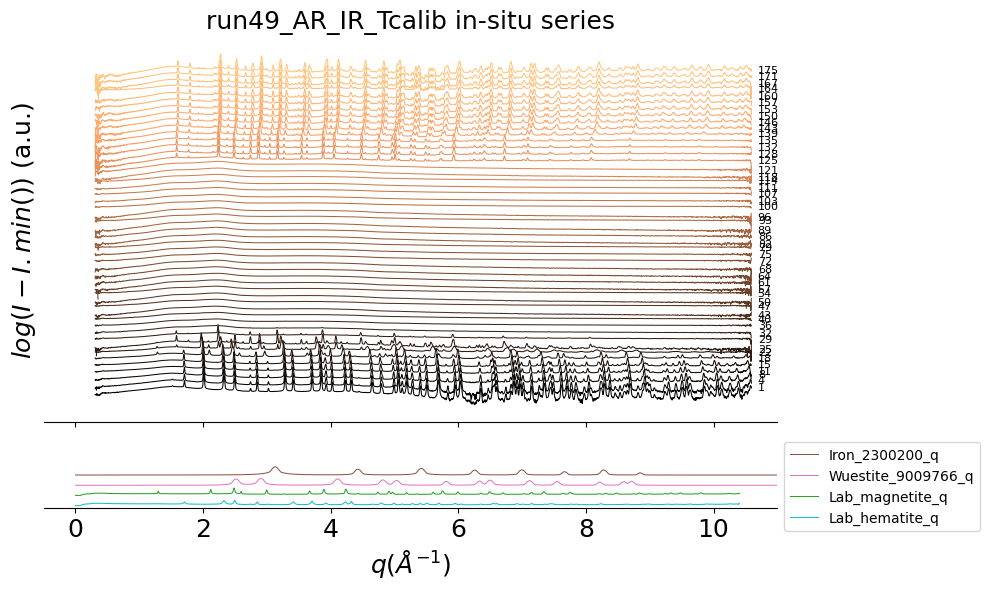

In [ ]:
#@title Waterfall plot
################### create figure object -- plotting settings ##########################################
#figsize = (12, 6)
figsize = (10, 6)
fs = 18
thisfs = 10
# fig, ax = plt.subplots(figsize=figsize, tight_layout=True)
fig, ax = plt.subplots(2, figsize=figsize, tight_layout=True, gridspec_kw={'height_ratios': [9, 1]})
ax[0].set_title(run_folder + ' ' + response + ' series', fontsize=fs)

ax[0].set_xlim([-.5,11])
ax[1].set_xlim([-.5,11])
# ax[1].set_ylim([-40,5])
ax[0].tick_params(labelsize=fs)
ax[1].tick_params(labelsize=fs)
ax[0].set_yticklabels('')
ax[1].set_yticklabels('')
ax[0].set_xticklabels('')

#### remove graph borders and unneeded ticks ####
ax[0].spines['top'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].get_yaxis().set_ticks([])
ax[0].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].get_yaxis().set_ticks([])
ax[1].spines['right'].set_visible(False)

#### plot reference phases ####
plot_mult_refs(ax[1])


############################## plotting selected timestamps  #######################################
num_of_lines = len(timestamps)
lincol_gradient = iter(cm.copper(np.linspace(0,1,num_of_lines))) #Wistia, copper, and autumn are nice gradients
counting = 0
for iv, timestamp in enumerate(timestamps):
    #print(iv)
    timestamp_num = int(timestamp.split('-')[-1]) # convert timestamp string to number
    filename = filedict[timestamp]
    rawdata = raw_data_save_all[iv, :, :]
    q = rawdata[:, 0]
    I = rawdata[:, 1]
    # print('length of I:', len(I))

    if timestamp == 'primary-1':
      print('This is the first file')
      I0 = I.copy() #fix I0!!!!!!!!!!!!!!!!!!!!!!!!!

    ######################### plot waterfall data ################################
    c=next(lincol_gradient)

    I_baselined = I-I.min()
    I0_baselined = I0-I0.min()

    wf_shift = iv*2 #*100
    # I_plot = I_baselined/I0_baselined.max() + wf_shift
    I_plot = np.log(I_baselined/I0_baselined.max()) + wf_shift
    ax[0].plot(q, I_plot, color = c, linewidth = lw)


    prim_num = int(timestamp.split('-')[1]) #return the # in the "primary-#" for this scan
    # print('prim_num:',prim_num)
    #### lineout label options ####
    if response == 'in-situ':
        # line_label = timestamp
        line_label = str(prim_num)
    elif response == 'depth':
        #print(save_depth[prim_num -1,1])
        line_label = str(save_depth[prim_num -1,1]) #return the corresponding depth for this scan
        line_label = line_label.split('mm')[0] #remove mm from the label
    else:
        print('something weird is going on')
    # ax[0].text(q[0]-.2, I_plot[0], line_label, ha='right', va='center', fontsize='8')
    ax[0].text(q[2999]+.1, I_plot[2700], line_label, ha='left', va='center', fontsize='8')
    # print(q[2700])

    counting = counting + 1

#### add legend and axes titles to the figure ####
ax[1].legend(loc='center left', bbox_to_anchor=[1, 0.5])

ax[1].set_xlabel(r'$q  ({\AA}^{-1})$', fontsize=fs)
# ax.set_ylabel(r'$I$', fontsize=fs)
# ax.set_ylabel(r'$log(I)$ (a.u.)', fontsize=fs)
ax[0].set_ylabel(r'$log({I - I.min()})$ (a.u.)', fontsize=fs)


# **Plotting Rietveld refinement results, laser, and pyrometer plots**

response = in-situ
define_surface: 41.78
len(phase_series): 4
plotting the phase_series... Fe
plotting the phase_series... W
plotting the phase_series... M
plotting the phase_series... H
number of scans: 175
saving file to: /content/isa_run49_20250127_010831.png


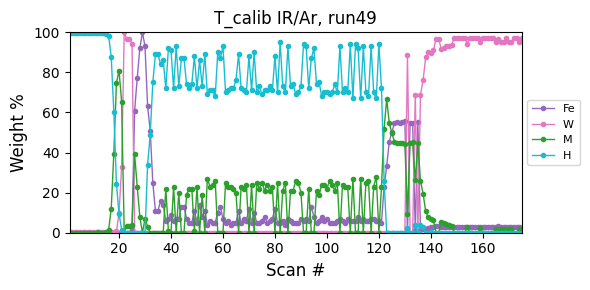

In [34]:
# @title in-situ weight % vs. time

from time import localtime, strftime
folderPath = '/content/isa_run49_20250127_010831.csv' #paste the folder path here
give_title = 'T_calib IR/Ar, run49'
data_series_type = ['in-situ','depth'] #0 or 1
response = data_series_type[0] #!#!#!#!#!#!#!#!#!#
print('response =', response)
define_surface = float('41.78')
print('define_surface:',define_surface)
scale = 100 #either 1 or 100, depending on whether you're plotting weight fraction or percent
independent_scale = 1 #for depth scans, either 1 or 1000 (um or mm)
lw = 1 #3 #linewidth for the plotting

lst_data = []
with open(folderPath, mode = 'r') as file:
    csvFile = csv.DictReader(file)
    for lines in csvFile:
        #print(lines)
        lst_data.append(lines) #extract data from the file for python treatment

primary = []
stage_height = []
Q_wt_fe = []
Q_wt_w = []
Q_wt_m = []
Q_wt_h = []
###
count = 0
text = 'primary'
# extr_depth = lst_data[count+1][''].split('_')[-4].replace('mm','')
# depth = extr_depth.replace(',','.')
# print('whats this say:',float(depth))
# print(lst_data[count][text])
# print(type(lst_data[count][text]))
# print(float(lst_data[count][text]))
# print(type(float(lst_data[count][text])))
for lines in lst_data:
    primary.append(int(float((lst_data[count]['primary']))))
    if response == 'depth':
        extr_stage_height = lst_data[count][''].split('_')[-4].replace('mm','')
        stage_height.append(float(extr_stage_height.replace(',','.')))
    Q_wt_fe.append(float(lst_data[count]['Qironalpha']))
    Q_wt_m.append(float(lst_data[count]['Qmagnetite']))
    Q_wt_w.append(float(lst_data[count]['QWustite'])) #case-sensitive
    Q_wt_h.append(float(lst_data[count]['Qhematite']))
    ###
    count = count + 1

primary = np.array(primary)
if response == 'depth':
    stage_height = np.array(stage_height)
Q_wt_fe = np.array(Q_wt_fe)
Q_wt_w = np.array(Q_wt_w)
Q_wt_m = np.array(Q_wt_m)
Q_wt_h = np.array(Q_wt_h)
###

# print('primary:',primary)
#print('stage_height:',stage_height)
# print(Q_wt_fe)
# print(Q_wt_w)
# print(Q_wt_m)
# print(Q_wt_h)

depth = []
ind = 0

if response == 'depth':
    for lines in lst_data:
        #print('count:',count)
        if stage_height[ind] == define_surface:
            depth.append(0)
        elif stage_height[ind] > define_surface:
            depth.append(stage_height[ind] - define_surface)
        else:
            depth.append(stage_height[ind] - define_surface) #depth.append(float('nan'))
        ind = ind + 1
    #print('depth:',depth)
    depth = np.array(depth)
####################### figure ########################
fs = 12
markersz = 20
if response == 'depth':
    figsize = (2.5,5) #(3,5) #width with legend and ticks
else:
    figsize = (6,3)
fig, ax = plt.subplots(figsize=figsize, tight_layout=True)

phase_series = ['Fe', 'W', 'M', 'H']
phase_colors = ['tab:purple', 'tab:pink','tab:green','tab:cyan'] #lincol_ceo2 = 'tab:orange'
###
n_phases = len(phase_series)
print('len(phase_series):',n_phases)

for i, phase_series in enumerate(phase_series):
    # print('i:',i)
    print('plotting the phase_series...',phase_series)
    if i == 0:
        y = Q_wt_fe
    elif i == 1:
        y = Q_wt_w
    elif i == 2:
        y = Q_wt_m
    elif i == 3:
        y = Q_wt_h
    ###
    else:
        print('phase missing from plotting')

    if response == 'depth':
        independent_axis = depth #primary
        plt.scatter(y*scale,independent_axis*independent_scale, marker = '.', s = markersz, c = phase_colors[i])
        plt.plot(y*scale,independent_axis*independent_scale, marker = '.', c = phase_colors[i], linewidth = lw,label = phase_series)
        plt.xlabel("Weight %", fontsize=fs, color='k')
        ax.set_xlim(0, 1*scale)
        ax.invert_xaxis()
        plt.ylabel('Depth (um)', fontsize=fs) #"Scan #"
        ax.set_ylim(min(independent_axis*independent_scale), 1.1*np.nanmax(independent_axis*independent_scale)) #0
        #ax.set_yticklabels([])
        ax.invert_yaxis()

        print('step size:',1000*(independent_axis[1]-independent_axis[0]),'um')

        #plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),ncol=n_phases,fontsize=6)
        plt.legend(loc='center left', bbox_to_anchor=(1, 1),fontsize=8)
    else:
        independent_axis = primary
        plt.ylabel('Scan #', fontsize=fs)
        plt.scatter(independent_axis*independent_scale,y*scale, marker = '.', s = markersz, c = phase_colors[i])
        plt.plot(independent_axis*independent_scale,y*scale, marker = '.', c = phase_colors[i], linewidth = lw,label = phase_series)
        plt.ylabel("Weight %", fontsize=fs, color='k')
        ax.set_ylim(0, 1*scale)
        # ax.invert_xaxis()
        plt.xlabel('Scan #', fontsize=fs)
        # ax.set_xlim(min(independent_axis*independent_scale), 1.1*np.nanmax(independent_axis*independent_scale)) #0
        ax.set_xlim(min(independent_axis*independent_scale), np.nanmax(independent_axis*independent_scale))
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8) #loc indicates the position of the box that you will provide the coordinates for with bbox_oto_anchor. 0 is the figure's left border, 1 is the right border

print('number of scans:',max(primary))




plt.title(give_title,fontsize=fs)
now = strftime("%Y%m%d_%H%M%S", localtime())
save_path = folderPath.replace('csv', 'png')
print('saving file to:',save_path)
plt.savefig(save_path)

if response == 'depth':
    txt_ypos = -.005 #0.85
    txt_xpos = .625 #1.15
    txt = 'surface @ y_stage=' + str(define_surface)
    plt.figtext(txt_xpos, txt_ypos, txt, wrap=True, horizontalalignment='center', fontsize=8)

Pyrometer start time: 06-22-2024 18:42:16  EDT (military)
x_max = 209.387


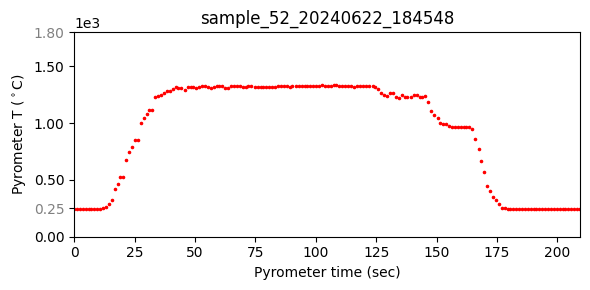

The log's first data point was at: Jun 22 2024 6:42:14 PM and the sampling time is 1 sec

x_axis =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,

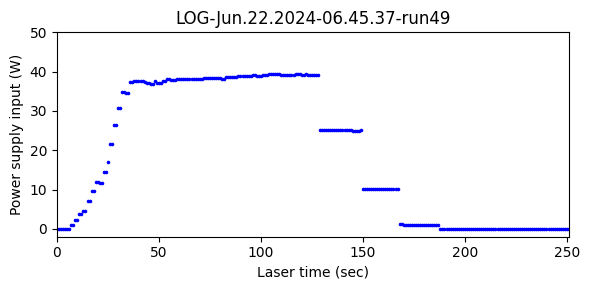

In [ ]:
#@title Load laser and pyrometer data
fn_pyrom = 'sample_52_20240622_184548' #!#!#!#!#!#!#!#!#!#
fp_pyrom = os.path.join(pyromdir, fn_pyrom + '.xlsx')

fn_laser = 'LOG-Jun.22.2024-06.45.37-run49' #!#!#!#!#!#!#!#!#!#
fp_laser = os.path.join(laserdir, fn_laser + '.csv')

markersz = 10 #marker size for the figures

#################### pyrometer #####################################
result = process_pyrom(fp_pyrom)

figsize = (6, 3)
fs = 18
fig, ax = plt.subplots(figsize=figsize, tight_layout=True)
ax.set_ylim(0, 1800)
ax.set_yticks([0, 250, 500, 1000, 1500, 1800])
ax.get_yticklabels()[1].set_color("gray") #changing the color for 248C
ax.get_yticklabels()[5].set_color("gray") #changing the color for 1800C

plt.scatter(result[0], result[1], marker = '.', s = markersz, c = 'r')
x_max = np.array(result[0], dtype='float32').max()
print('x_max =', x_max)
ax.set_xlim(0, x_max)

plt.ylabel("Pyrometer T ($^\circ$C)")
plt.xlabel("Pyrometer time (sec)")
plt.title(fn_pyrom)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.show()


###################### laser log ###################################
result = process_laserlog(fp_laser)

st = result[0]
lt = result[1]
recnum = result[2]
power = result[3]

x_axis_laser = [i * int(st) for i in recnum]
y_axis_laser = power
x_lim = max(np.array(x_axis_laser))
print('x_axis = ', x_axis_laser)


figsize = (6, 3)
fs = 18
fig, ax = plt.subplots(figsize=figsize, tight_layout=True)

#txt = 'The log began recording at ' + lt + ' with ' + st +' sec sampling \n t = 0 in the plot above is '+ t_xrd_start
plt.scatter(x_axis_laser, y_axis_laser, marker = '.', s = markersz, c = 'b')
plt.ylabel("Power supply input (W)")
plt.xlabel("Laser time (sec)")
plt.title(fn_laser)
#plt.figtext(0.5, -.125, txt, wrap=True, horizontalalignment='center', fontsize=10)
ax.set_xlim(0, x_lim)
ax.set_yticks([0, 10, 20, 30, 40, 50])

Pyrometer start time: 06-22-2024 18:42:16  EDT (military)
The log's first data point was at: Jun 22 2024 6:42:14 PM and the sampling time is 1 sec

string_start_laser: Jun 22 2024 6:42:14 PM
t_laser_sampling 1
As pd.Timestamp, laser: 18:42:14 pyrom: 18:42:16
timestamp difference: start_laser - start_pyrom = -1 days +23:59:58
The laser log started recording first
index_offset_rounded: 2


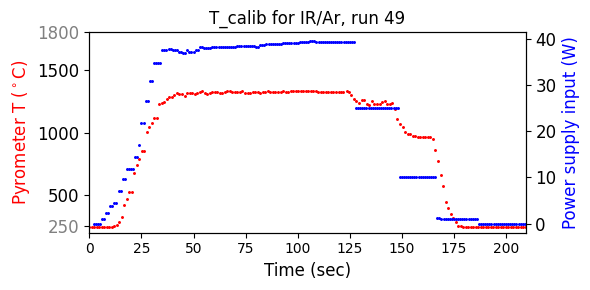

In [ ]:
#@title Combined plot: pyrometer/laser PS

#!#!#!#!#!#!#!#!#!# inputs #!#!#!#!#!#!#!#!#!#
#use fn_pyrom and fn_laser from the previous section
#in-situ XRD file: run58_realhematite_vac_IR
title = 'T_calib for IR/Ar, run 49' #plot title

import math
from datetime import datetime
#Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html

######################## plotting the combined figure #######################
figsize = (6, 3)
fs = 12
markersz = 5
col_pyrom = 'r'
col_laser = 'blue' #'navy'
fig, ax1 = plt.subplots(figsize=figsize, tight_layout=True)

plt.title(title)
ax1.set_xlabel("Time (sec)", fontsize=fs)

#### pyrometer axis ####
ax1.set_ylabel("Pyrometer T ($^\circ$C)", fontsize=fs, color=col_pyrom)
ax1.set_ylim(200, 1800)
ax1.set_yticks([250, 500, 1000, 1500, 1800])
ax1.get_yticklabels()[0].set_color("gray") #changing the color for 248C
ax1.get_yticklabels()[-1].set_color("gray") #changing the color for 1800C
ax1.tick_params(axis='y', labelsize=fs)

#### laser axis ****
ax2 = ax1.twinx()
ax2.set_ylabel('Power supply input (W)', fontsize=fs, color=col_laser)
ax2.set_yticks([0, 10, 20, 30, 40, 50])
ax2.tick_params(axis='y', labelsize=fs)

#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

############ pyrometer ###################
result_pyrom = process_pyrom(fp_pyrom)
start_pyrom = result_pyrom[2] #pyrometer's t0
timestamp_start_pyrom = pd.Timestamp(start_pyrom, tz='America/New_York') #setting the format to Timestamp, from a string
#end_pyrom =
x_max = np.array(result_pyrom[0], dtype='float32').max()
x_axis_pyrom = result_pyrom[0]
y_axis_pyrom = result_pyrom[1]

############ laser log ###################
result_laser = process_laserlog(fp_laser)
string_start_laser = result_laser[1] #this is good now
print('string_start_laser:',string_start_laser)
timestamp_start_laser = pd.Timestamp(string_start_laser, tz='America/New_York') #laser log's t0 (military time, matching the timezone we recorded in)
t_laser_sampling = int(result_laser[0]) #seconds per rec:index
print('t_laser_sampling', t_laser_sampling)
recnum = result_laser[2]
power = result_laser[3]

#convert to date time to avoid operation errors
print('As pd.Timestamp, laser:', pd.Timestamp.timetz(timestamp_start_laser),'pyrom:',pd.Timestamp.timetz(timestamp_start_pyrom))
print('timestamp difference: start_laser - start_pyrom =',timestamp_start_laser - timestamp_start_pyrom)


if timestamp_start_laser < timestamp_start_pyrom:
    print('The laser log started recording first')
    deltat0 = timestamp_start_pyrom - timestamp_start_laser
    deltat0_sec = deltat0 / np.timedelta64(1, 's')
    #print('deltat0_sec =',deltat0_sec)
    index_offset_t0 = deltat0_sec / t_laser_sampling #finds the laser rec:index that corresponds to the pyrometer's t0.
    index_offset_t0_rounded = math.ceil(index_offset_t0) #if the index is a non-integer, then plot the first index AFTER the pyrometer's t0
    print('index_offset_rounded:',index_offset_t0_rounded)

    #don't need to find the index that corresponds to t_final_x_ray, since we'll just cut the plotting off at the pyrometer's x_max
    y_laser = power[1+index_offset_t0_rounded : len(recnum)-1]

    start = 0
    step = t_laser_sampling
    num = len(y_laser)
    x_laser = index_offset_t0 + np.arange(0, num) * step #expressing laser data points in time, where t0 is set by the pyrometer

elif timestamp_start_pyrom <= timestamp_start_laser:
    print('The pyrometer started recording first')
    deltat0 = timestamp_start_laser - timestamp_start_pyrom
    deltat0_sec = deltat0 / np.timedelta64(1, 's')
    index_offset_t0 = deltat0_sec / t_laser_sampling

    y_laser = power
    start = 0
    step = t_laser_sampling
    num = len(y_laser)
    x_laser = index_offset_t0 + np.arange(0, num) * step

    #print('I have yet to test that this cell works as intended. But it should work. Need to find an experiment that fits this though.')


ax1.scatter(x_axis_pyrom, y_axis_pyrom, marker = '.', s = markersz, c = col_pyrom) #pyrometer
ax1.set_xlim(0, x_max)

ax2.scatter(x_laser, y_laser, marker = '.', s = markersz, c = col_laser) #laser log

plt.show()

In [ ]:
#@title (in progress) Combined plot: calibrated T / incident laser power --- input the T and P offsets from the validated calibration
title = 'T_calib for IR/Ar, run 49' #plot title

figsize = (6, 3)
fs = 12
markersz = 5
col_pyrom = 'r'
col_laser = 'blue' #'navy'
fig, ax1 = plt.subplots(figsize=figsize, tight_layout=True)

plt.title(title)
ax1.set_xlabel("Time (sec)", fontsize=fs)

#### pyrometer axis ####
# ax1.set_ylabel("Pyrometer T ($^\circ$C)", fontsize=fs, color=col_pyrom)
# ax1.set_ylim(200, 1800)
# ax1.set_yticks([250, 500, 1000, 1500, 1800])
# ax1.get_yticklabels()[0].set_color("gray") #changing the color for 248C
# ax1.get_yticklabels()[-1].set_color("gray") #changing the color for 1800C
ax1.tick_params(axis='y', labelsize=fs)

#### laser axis ****
ax2 = ax1.twinx()
# ax2.set_ylabel('Power supply input (W)', fontsize=fs, color=col_laser)
# ax2.set_yticks([0, 10, 20, 30, 40, 50])
ax2.tick_params(axis='y', labelsize=fs)

#### calibrated values ####
# Toffset =
# Poffset =
# y_axis_pyrom_calib = _axis_pyrom + Toffset
# y_laser_calib = y_laser + Poffset

# ax1.scatter(x_axis_pyrom, y_axis_pyrom_calib, marker = '.', s = markersz, c = col_pyrom) #pyrometer
# ax1.set_xlim(0, x_max)

# ax2.scatter(x_laser, y_laser_calib, marker = '.', s = markersz, c = col_laser) #laser log

plt.show()

In [ ]:
#@title (in progress) Calibrated T --- will want to make this a comparison of the ceria-mix pellet: peak shift and the refinement methods
